In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from joblib import dump, load

In [2]:
from google.colab import drive
from IPython.display import clear_output
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/32bitdata/bitsDataset.csv")

In [4]:
bitsCols = []
for i in range(31,-1,-1):
  bitsCols.append('Bit {}'.format(i))
X = df.loc[:, bitsCols]
Y = df.loc[:, 'Class']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
import numpy as np

#15% train 85% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.85, random_state=0)

#We initialize data structures and the regularization parameter.
regul_param = 10.0 ** -2

train_scores = []
test_scores = []
clasificadores = []
clf_nom = []
clf_top = []


# **In case you want to train the models**

## **Initial 200 neuron models**

In [ ]:
clf200=MLPClassifier(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto',
                   learning_rate='constant', learning_rate_init=0.001, max_iter=200,verbose= True, random_state = 333).fit(X_train, y_train.ravel())
clear_output()
clasificadores.append(clf200)
clf_nom.append('clf200')
clf_top.append('200')

In [ ]:
clf155=MLPClassifier(hidden_layer_sizes=(100,50,50, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto',
                   learning_rate='constant', learning_rate_init=0.001, max_iter=200,verbose= True, random_state = 333).fit(X_train, y_train.ravel())
clear_output()
clasificadores.append(clf155)
clf_nom.append('clf155')
clf_top.append('100,50,50')

## **Different 100 neuron topologies**

In [ ]:
clf100=MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
                    learning_rate='constant', learning_rate_init=0.001, max_iter=200,verbose= True, random_state = 333).fit(X_train, y_train.ravel())
clear_output()
clasificadores.append(clf100)
clf_nom.append('clf100')
clf_top.append('100')

In [ ]:
clf80=MLPClassifier(hidden_layer_sizes=(80,15,5, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
                    learning_rate='constant', learning_rate_init=0.001, max_iter=200,verbose= True, random_state = 333).fit(X_train, y_train.ravel())
clear_output()
clasificadores.append(clf80)
clf_nom.append('clf80')
clf_top.append('80,15,5')

In [ ]:
clf70=MLPClassifier(hidden_layer_sizes=(70,25,5, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto',
                    learning_rate='constant', learning_rate_init=0.001, max_iter=200,verbose= True, random_state = 333).fit(X_train, y_train.ravel())
clear_output()
clasificadores.append(clf70)
clf_nom.append('clf70')
clf_top.append('70,25,5')

In [ ]:
clf5050=MLPClassifier(hidden_layer_sizes=(50,50, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto',
                      learning_rate='constant', learning_rate_init=0.001, max_iter=200,verbose= True, random_state = 333).fit(X_train, y_train.ravel())
clear_output()
clasificadores.append(clf5050)
clf_nom.append('clf5050')
clf_top.append('50,50')

In [ ]:
clf5025=MLPClassifier(hidden_layer_sizes=(50,25,25, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto',
                      learning_rate='constant', learning_rate_init=0.001, max_iter=200,verbose= True, random_state = 333).fit(X_train, y_train.ravel())
clear_output()
clasificadores.append(clf5025)
clf_nom.append('clf5025')
clf_top.append('50,25,25')

In [ ]:
clf5030=MLPClassifier(hidden_layer_sizes=(50,30,10,10, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto',
                      learning_rate='constant', learning_rate_init=0.001, max_iter=200,verbose= True, random_state = 333).fit(X_train, y_train.ravel())
clear_output()
clasificadores.append(clf5030)
clf_nom.append('clf5030')
clf_top.append('50,30,10,10')

## **Refined 200 neuron topology**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
import numpy as np


regul_param = 10.0 ** -2

MLP=MLPClassifier(hidden_layer_sizes=(160,25,10,5, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500,verbose= True, random_state = 333).fit(X_train, y_train.ravel())
clear_output()
clasificadores.append(MLP)
clf_nom.append('MLP')
clf_top.append('160,25,10,5')

## **To save weights and biases**

In [18]:
#We check that we have the trained models
print(len(clasificadores))
print(len(clf_nom), ' ', clf_nom)
print(len(clf_top), ' ', clf_top)
print(len(train_scores), ' ', train_scores)
print(len(test_scores), ' ', test_scores)

9
9   ['clf200', 'clf155', 'clf100', 'clf80', 'clf70', 'clf5050', 'clf5025', 'clf5030', 'MLP']
9   ['200', '100,50,50', '100', '80,15,5', '70,25,5', '50,50', '50,25,25', '50,30,10,10', '160,25,10,5']
9   [0.9833149081450171, 0.9888782311819216, 0.9763615672248415, 0.9830840513737603, 0.9829279791903756, 0.9768216550154446, 0.9761063241749309, 0.9787042757275239, 0.9895626727361405]
9   [0.9817246428702582, 0.98507818524843, 0.9754384364327421, 0.9813416349932063, 0.9810223183136866, 0.9754688475450773, 0.974817590705446, 0.9772510534868348, 0.9864550053248136]


In [ ]:
#We save the data to .joblib files
for i in range(len(clasificadores)):
  filename= clf_nom[i] + '.joblib'
  dump(clasificadores[i],filename)

# **In case you want to import weights and biases from pre-trained models**

In [6]:
clf200= load("/content/drive/MyDrive/32bitdata/clf200.joblib")
clasificadores.append(clf200)
clf_nom.append('clf200')
clf_top.append('200')


In [7]:
clf155= load("/content/drive/MyDrive/32bitdata/clf155.joblib")
clasificadores.append(clf155)
clf_nom.append('clf155')
clf_top.append('100,50,50')

In [8]:
clf100= load("/content/drive/MyDrive/32bitdata/clf100.joblib")
clasificadores.append(clf100)
clf_nom.append('clf100')
clf_top.append('100')

In [9]:
clf80= load("/content/drive/MyDrive/32bitdata/clf80.joblib")
clasificadores.append(clf80)
clf_nom.append('clf80')
clf_top.append('80,15,5')

In [10]:
clf70= load("/content/drive/MyDrive/32bitdata/clf70.joblib")
clasificadores.append(clf70)
clf_nom.append('clf70')
clf_top.append('70,25,5')

In [11]:
clf5050= load("/content/drive/MyDrive/32bitdata/clf5050.joblib")
clasificadores.append(clf5050)
clf_nom.append('clf5050')
clf_top.append('50,50')

In [12]:
clf5025= load("/content/drive/MyDrive/32bitdata/clf5025.joblib")
clasificadores.append(clf5025)
clf_nom.append('clf5025')
clf_top.append('50,25,25')

In [13]:
clf5030= load("/content/drive/MyDrive/32bitdata/clf5030.joblib")
clasificadores.append(clf5030)
clf_nom.append('clf5030')
clf_top.append('50,30,10,10')

In [14]:
MLP= load("/content/drive/MyDrive/32bitdata/MLP.joblib")
clasificadores.append(MLP)
clf_nom.append('MLP')
clf_top.append('160,25,10,5')

# **Computing train and test accuracies**

In [16]:
for i in range(len(clasificadores)):
  print('Topology ',clf_top[i],':')
  y_train_pred= clasificadores[i].predict(X_train)
  y_test_pred = clasificadores[i].predict(X_test)
  f_train = f1_score(y_train, y_train_pred, average='micro')
  print(' Train: ', f_train)
  f_test = f1_score(y_test, y_test_pred, average='micro')
  print(' Test: ', f_test)
  train_scores.append(f_train)
  test_scores.append(f_test)
  print('')

Topology  200 :
 Train:  0.9833149081450171
 Test:  0.9817246428702582

Topology  100,50,50 :
 Train:  0.9888782311819216
 Test:  0.98507818524843

Topology  100 :
 Train:  0.9763615672248415
 Test:  0.9754384364327421

Topology  80,15,5 :
 Train:  0.9830840513737603
 Test:  0.9813416349932063

Topology  70,25,5 :
 Train:  0.9829279791903756
 Test:  0.9810223183136866

Topology  50,50 :
 Train:  0.9768216550154446
 Test:  0.9754688475450773

Topology  50,25,25 :
 Train:  0.9761063241749309
 Test:  0.974817590705446

Topology  50,30,10,10 :
 Train:  0.9787042757275239
 Test:  0.9772510534868348

Topology  160,25,10,5 :
 Train:  0.9895626727361405
 Test:  0.9864550053248136



In [17]:
#We check that we have the trained models
print(len(clasificadores))
print(len(clf_nom), ' ', clf_nom)
print(len(clf_top), ' ', clf_top)
print(len(train_scores), ' ', train_scores)
print(len(test_scores), ' ', test_scores)


9
9   ['clf200', 'clf155', 'clf100', 'clf80', 'clf70', 'clf5050', 'clf5025', 'clf5030', 'MLP']
9   ['200', '100,50,50', '100', '80,15,5', '70,25,5', '50,50', '50,25,25', '50,30,10,10', '160,25,10,5']
9   [0.9833149081450171, 0.9888782311819216, 0.9763615672248415, 0.9830840513737603, 0.9829279791903756, 0.9768216550154446, 0.9761063241749309, 0.9787042757275239, 0.9895626727361405]
9   [0.9817246428702582, 0.98507818524843, 0.9754384364327421, 0.9813416349932063, 0.9810223183136866, 0.9754688475450773, 0.974817590705446, 0.9772510534868348, 0.9864550053248136]


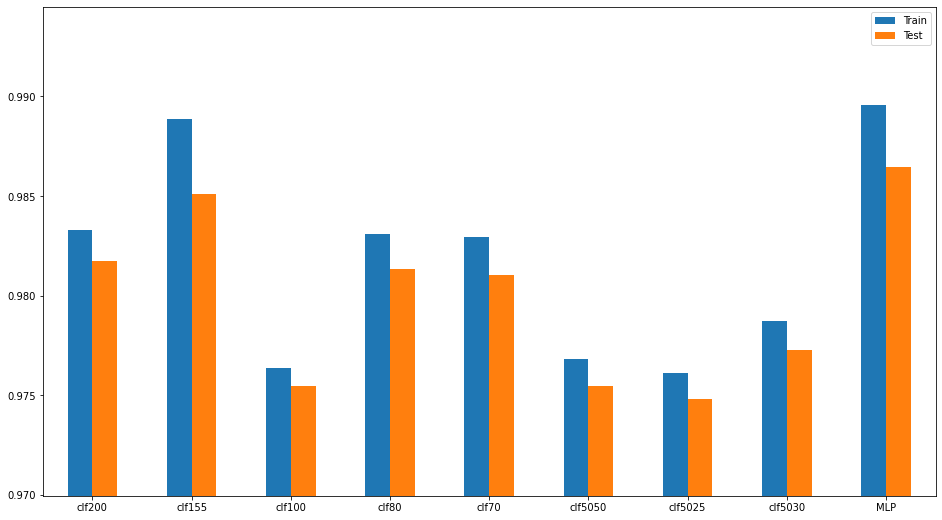

In [19]:
#pltdf = pd.DataFrame({'Train': train_scores,'Test': test_scores}, index=clf_top)
pltdf = pd.DataFrame({'Train': train_scores,'Test': test_scores}, index=clf_nom)

sup = 1.005*max(max(train_scores),max(test_scores))
inf = 0.995*min(min(train_scores),min(test_scores))
ax = pltdf.plot.bar(rot=0,figsize=(16,9),ylim=[inf,sup])

## **To obtain more deatails of an specific classifier**

In [20]:
from sklearn.metrics import classification_report
classifier = MLP
y_test_pred = classifier.predict(X_test)
print(classification_report(y_test, y_test_pred, digits= 4))

                precision    recall  f1-score   support

Complementario     0.9861    0.9868    0.9865   1742986
       Dataset     0.9868    0.9861    0.9864   1742582

      accuracy                         0.9865   3485568
     macro avg     0.9865    0.9865    0.9865   3485568
  weighted avg     0.9865    0.9865    0.9865   3485568



In [21]:
# Funtion imported from
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Actual Label',
           xlabel='Predicted Label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if normalize:
        title+= ' (normalized)'
    plt.savefig(title+'.pdf')
    return ax


Confusion matrix
[[1719958   23028]
 [  24184 1718398]]
Normalized confusion matrix
[[0.98678819 0.01321181]
 [0.01387826 0.98612174]]


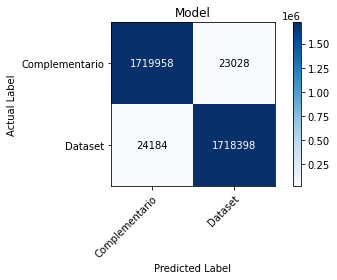

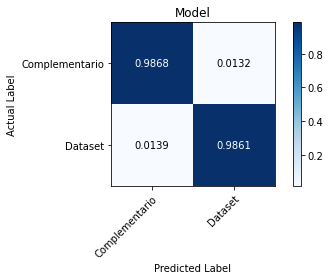

In [22]:
plot_confusion_matrix(y_test, y_test_pred, normalize = False, title='Model')
plot_confusion_matrix(y_test, y_test_pred, normalize = True, title='Model')

# **r-Weight computation of the 100 neuron, single-layer MLP**

To compute first layer r-weights in the single-layer MLP we compute each neuron's weight matrix by the neuron's weight for the output neuron's lineal combination.

For a rough first visualization, we arrange the r-weights as a 8x4 matrix in descending order.

In [23]:
np.set_printoptions(precision=2,suppress=True)
for i in range(100):
  v = clf100.coefs_[0].T[i] * clf100.coefs_[1][i]
  v = v.reshape(4,8)
  print(v)
  print()

clf100.coefs_[0].shape

'''   Input bit leyend
      ____________________________________________________________
      |              1             |||              0            |<--b2
      |-------------++-------------+++------+------++------+-----|
      |      1      ||      0      |||      1      ||      0     |<--b1
______|-------------++-------------+++------+------++------+-----|
|b4|b5|   1  |   0  ||  1   |   0  |||   1  |   0  ||  1   |  0  |<--b0
|--+--+------+------++-------------+++-------------++------+-----|
|1 |  |-0.04 | 0.05 || 0.04 |-0.03 |||-1.16 | 1.17 || 1.15 |-1.14|
|--+ 1+------+------++-------------+++-------------++------+-----|
|0 |  |-0.09 | 0.07 || 0.07 |-0.1  ||| 1.03 |-0.99 ||-1.04 | 1.01|
|--+--+------+------++-------------+++-------------++------+-----|
|--+--+------+------++-------------+++-------------++------+-----|
|1 |  |-0.   | 0.04 || 0.   |-0.03 ||| 0.   | 0.03 || 0.03 |-0.01|
|--+ 0+------+------++-------------+++-------------++------+-----|
|0 |  |-0.01 |-0.   || 0.02 | 0.02 ||| 0.   |-0.01 ||-0.01 |-0.03|
|----------------------------------------------------------------|

Output
[[-0.04  0.05  0.04 -0.03 -1.16  1.17  1.15 -1.14]
 [-0.09  0.07  0.07 -0.1   1.03 -0.99 -1.04  1.01]
 [-0.    0.04  0.   -0.03  0.    0.03  0.03 -0.01]
 [-0.01 -0.    0.02  0.02  0.   -0.01 -0.01 -0.03]]

 '''



[[-0.04  0.05  0.04 -0.03 -1.16  1.17  1.15 -1.14]
 [-0.09  0.07  0.07 -0.1   1.03 -0.99 -1.04  1.01]
 [-0.    0.04  0.   -0.03  0.    0.03  0.03 -0.01]
 [-0.01 -0.    0.02  0.02  0.   -0.01 -0.01 -0.03]]

[[ 0.99  1.   -1.01 -1.   -1.04 -1.    1.02  1.03]
 [-1.28 -1.26  1.29  1.3   1.31  1.28 -1.32 -1.32]
 [-0.02  0.   -0.04 -0.03  0.01 -0.01  0.03  0.  ]
 [ 0.01  0.02  0.01  0.02  0.01 -0.   -0.01  0.  ]]

[[-0.99  0.77  0.72 -1.03  0.4  -0.76 -0.71  0.73]
 [ 0.78 -1.01 -1.22  1.19 -0.91  0.62  0.95 -1.35]
 [-0.09 -0.14 -0.13 -0.07 -0.15 -0.14 -0.49  0.33]
 [-0.03 -0.15 -0.05 -0.4  -0.06  0.34  0.12 -0.58]]

[[-0.85 -0.02  0.85 -0.01  0.86  0.01 -0.88 -0.  ]
 [ 0.89 -0.   -0.86 -0.01 -0.85 -0.    0.86  0.01]
 [ 1.06 -0.01 -1.04 -0.04 -1.05  0.03  1.1   0.01]
 [-1.05  0.01  1.05 -0.01  1.06  0.02 -1.04  0.03]]

[[-0.1   0.92 -0.12  0.97  0.14 -0.99  0.12 -0.98]
 [-0.13  0.9  -0.11  0.95  0.11 -0.97  0.12 -0.93]
 [ 0.12 -1.19  0.08 -1.19 -0.09  1.2  -0.1   1.21]
 [ 0.08 -1.15  0.1  -1.

'   Input bit leyend\n      ____________________________________________________________\n      |              1             |||              0            |<--b2\n      |-------------++-------------+++------+------++------+-----|\n      |      1      ||      0      |||      1      ||      0     |<--b1\n______|-------------++-------------+++------+------++------+-----|\n|b4|b5|   1  |   0  ||  1   |   0  |||   1  |   0  ||  1   |  0  |<--b0\n|--+--+------+------++-------------+++-------------++------+-----|\n|1 |  |-0.04 | 0.05 || 0.04 |-0.03 |||-1.16 | 1.17 || 1.15 |-1.14|\n|--+ 1+------+------++-------------+++-------------++------+-----|\n|0 |  |-0.09 | 0.07 || 0.07 |-0.1  ||| 1.03 |-0.99 ||-1.04 | 1.01|\n|--+--+------+------++-------------+++-------------++------+-----|\n|--+--+------+------++-------------+++-------------++------+-----|\n|1 |  |-0.   | 0.04 || 0.   |-0.03 ||| 0.   | 0.03 || 0.03 |-0.01|\n|--+ 0+------+------++-------------+++-------------++------+-----|\n|0 |  |-0.0